In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data=pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
data.shape

(319795, 18)

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# remove outliers 

In [8]:
max_thresold= data.BMI.quantile( 0.95)
max_thresold

40.18

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BMI'>

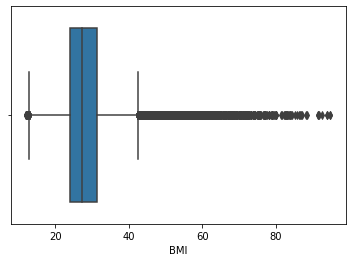

In [9]:
sns.boxplot(data['BMI'])

In [10]:
data[data.BMI>max_thresold].shape

(15900, 18)

In [11]:
min_threshold,max_thresoldS = data.SleepTime.quantile([0.01, 0.99])
min_threshold,max_thresoldS

(3.0, 12.0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SleepTime'>

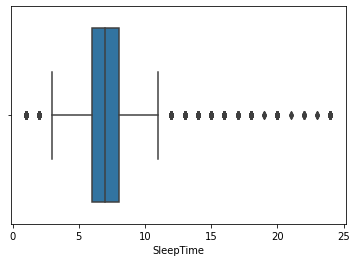

In [12]:
sns.boxplot(data['SleepTime'])

In [13]:
data[data.SleepTime>max_thresoldS].shape

(999, 18)

In [14]:
data[data.SleepTime<min_threshold].shape

(1339, 18)

In [15]:
data=data[(data.SleepTime < max_thresoldS)&(data.SleepTime > min_threshold)&(data.BMI <max_thresold)]

data.shape

(297732, 18)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PhysicalHealth'>

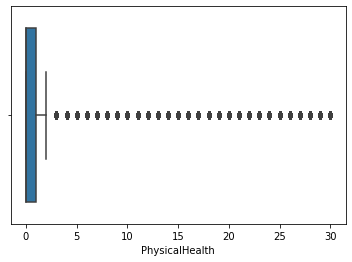

In [16]:
sns.boxplot(data['PhysicalHealth'])

In [17]:
max_thresold= data.PhysicalHealth.quantile( 0.85)
max_thresold

5.0

In [18]:
data[data.PhysicalHealth>max_thresold].shape

(40282, 18)

In [19]:
data=data[(data.PhysicalHealth <max_thresold)]

data.shape

(250568, 18)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MentalHealth'>

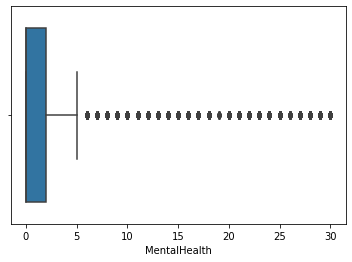

In [20]:
sns.boxplot(data['MentalHealth'])

In [21]:
max_thresold= data.MentalHealth.quantile( 0.85)
max_thresold

5.0

In [22]:
data[data.MentalHealth>max_thresold].shape

(34096, 18)

In [23]:
data=data[(data.MentalHealth <max_thresold)]

data.shape

(206010, 18)

# Remove duplicated

In [24]:

data.duplicated().sum()


17775

In [25]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [26]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188235 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      188235 non-null  object 
 1   BMI               188235 non-null  float64
 2   Smoking           188235 non-null  object 
 3   AlcoholDrinking   188235 non-null  object 
 4   Stroke            188235 non-null  object 
 5   PhysicalHealth    188235 non-null  float64
 6   MentalHealth      188235 non-null  float64
 7   DiffWalking       188235 non-null  object 
 8   Sex               188235 non-null  object 
 9   AgeCategory       188235 non-null  object 
 10  Race              188235 non-null  object 
 11  Diabetic          188235 non-null  object 
 12  PhysicalActivity  188235 non-null  object 
 13  GenHealth         188235 non-null  object 
 14  SleepTime         188235 non-null  float64
 15  Asthma            188235 non-null  object 
 16  KidneyDisease     18

In [28]:
data['Diabetic'].value_counts()

No                         161390
Yes                         21339
No, borderline diabetes      4072
Yes (during pregnancy)       1434
Name: Diabetic, dtype: int64

In [29]:
data=data.replace("No",0)
data=data.replace("Yes",1)
data=data.replace("Male",0)
data=data.replace("Female",1)
data=data.replace("No, borderline diabetes",0)
data=data.replace("Yes (during pregnancy)",1)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188235 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      188235 non-null  int64  
 1   BMI               188235 non-null  float64
 2   Smoking           188235 non-null  int64  
 3   AlcoholDrinking   188235 non-null  int64  
 4   Stroke            188235 non-null  int64  
 5   PhysicalHealth    188235 non-null  float64
 6   MentalHealth      188235 non-null  float64
 7   DiffWalking       188235 non-null  int64  
 8   Sex               188235 non-null  int64  
 9   AgeCategory       188235 non-null  object 
 10  Race              188235 non-null  object 
 11  Diabetic          188235 non-null  int64  
 12  PhysicalActivity  188235 non-null  int64  
 13  GenHealth         188235 non-null  object 
 14  SleepTime         188235 non-null  float64
 15  Asthma            188235 non-null  int64  
 16  KidneyDisease     18

In [31]:
class_0 = data[data['GenHealth'] == 'Poor']
class_0['GenHealth'].value_counts()
class_0.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
45,1,20.37,1,0,0,3.0,0.0,0,1,70-74,White,0,0,Poor,10.0,0,0,0
125,0,39.53,0,0,0,3.0,3.0,1,1,80 or older,Black,1,0,Poor,7.0,0,1,0
131,1,37.59,1,0,0,0.0,0.0,0,1,70-74,White,0,0,Poor,7.0,0,0,0
334,1,25.61,0,0,0,0.0,0.0,1,1,80 or older,White,0,0,Poor,7.0,1,0,0
396,1,26.96,1,1,0,0.0,0.0,1,0,65-69,White,0,1,Poor,8.0,0,0,0


# categorical features

In [32]:
data['AgeCategory'].value_counts()

65-69          20981
70-74          19961
60-64          19565
55-59          16832
80 or older    16386
50-54          14468
75-79          14437
45-49          12439
40-44          11985
35-39          11432
18-24          10510
30-34          10253
25-29           8986
Name: AgeCategory, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '80 or older'),
  Text(1, 0, '75-79'),
  Text(2, 0, '55-59'),
  Text(3, 0, '50-54'),
  Text(4, 0, '60-64'),
  Text(5, 0, '70-74'),
  Text(6, 0, '65-69'),
  Text(7, 0, '45-49'),
  Text(8, 0, '18-24'),
  Text(9, 0, '35-39'),
  Text(10, 0, '40-44'),
  Text(11, 0, '30-34'),
  Text(12, 0, '25-29')])

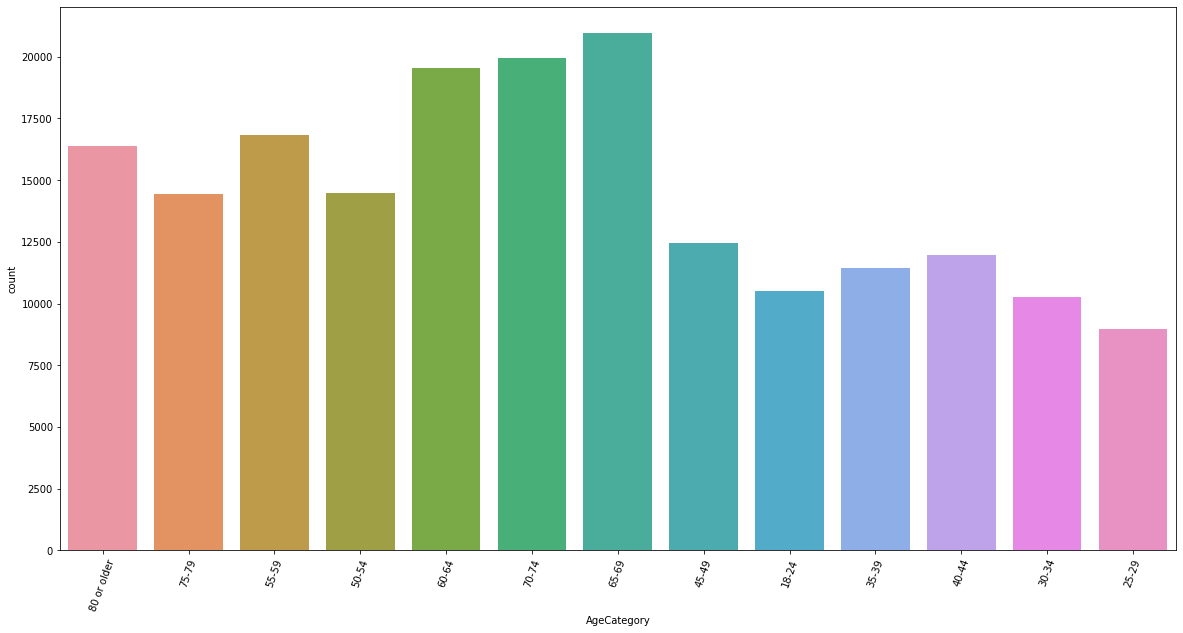

In [33]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='AgeCategory',data=data)
plt.xticks(rotation=70)

In [34]:
data['GenHealth'].value_counts()

Very good    74362
Good         54786
Excellent    47167
Fair         11130
Poor           790
Name: GenHealth, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very good'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Fair'),
  Text(3, 0, 'Excellent'),
  Text(4, 0, 'Poor')])

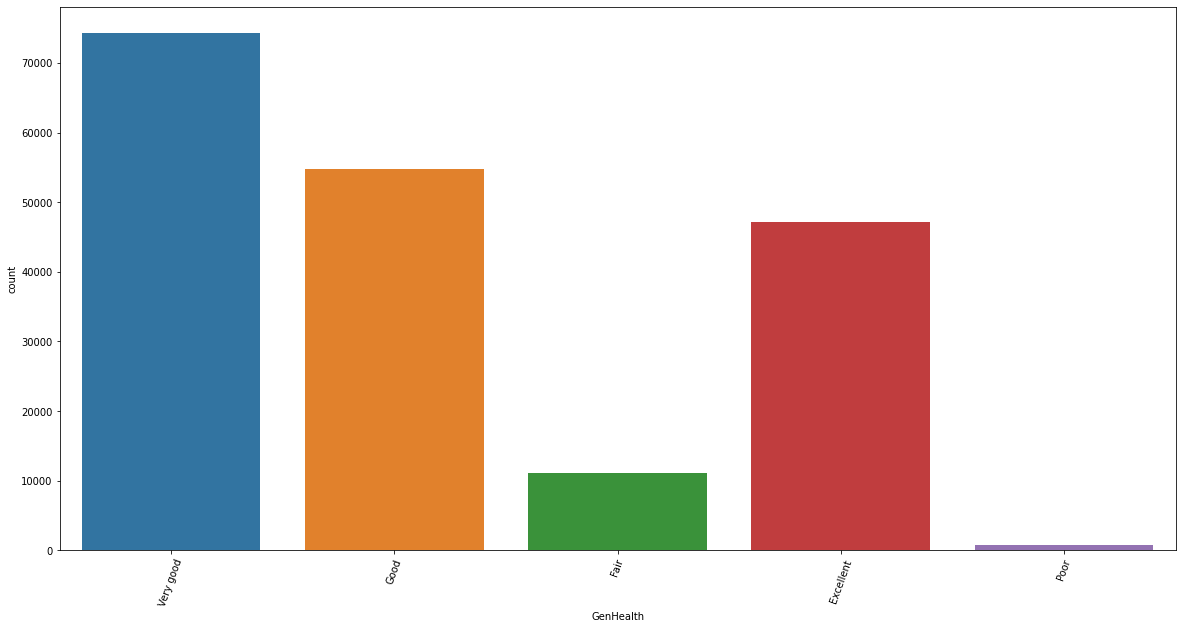

In [35]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='GenHealth',data=data)
plt.xticks(rotation=70)

In [36]:
from category_encoders import TargetEncoder
Encoder=TargetEncoder()
Encoder.fit(X=data['GenHealth'],y=data['HeartDisease'])
data['GenHealth'] = Encoder.transform(X=data['GenHealth'],y=data['HeartDisease'])
Encoder1=TargetEncoder()
Encoder1.fit(X=data['AgeCategory'],y=data['HeartDisease'])
data['AgeCategory'] = Encoder1.transform(X=data['AgeCategory'],y=data['HeartDisease'])

data=data.drop('Race',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188235 entries, 1 to 319792
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      188235 non-null  int64  
 1   BMI               188235 non-null  float64
 2   Smoking           188235 non-null  int64  
 3   AlcoholDrinking   188235 non-null  int64  
 4   Stroke            188235 non-null  int64  
 5   PhysicalHealth    188235 non-null  float64
 6   MentalHealth      188235 non-null  float64
 7   DiffWalking       188235 non-null  int64  
 8   Sex               188235 non-null  int64  
 9   AgeCategory       188235 non-null  float64
 10  Diabetic          188235 non-null  int64  
 11  PhysicalActivity  188235 non-null  int64  
 12  GenHealth         188235 non-null  float64
 13  SleepTime         188235 non-null  float64
 14  Asthma            188235 non-null  int64  
 15  KidneyDisease     188235 non-null  int64  
 16  SkinCancer        18

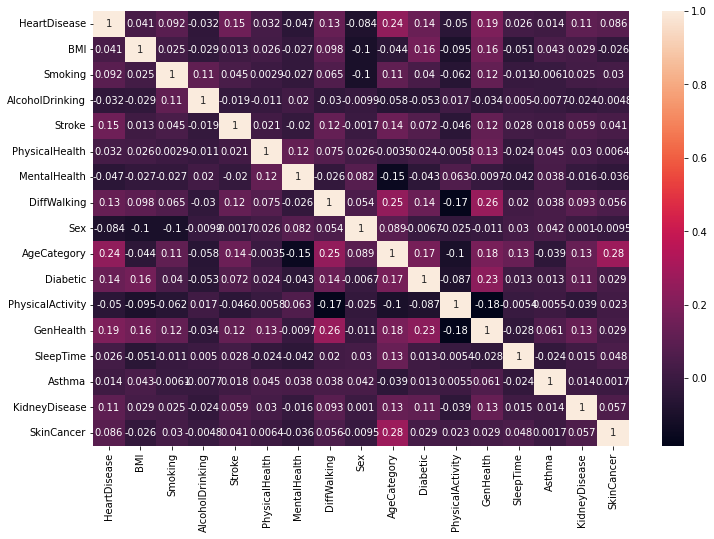

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
top_feature = corr.index
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

#  Handle Imbalanced data
reference:https://www.youtube.com/watch?v=JnlM4yLFNuo&t=993s

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

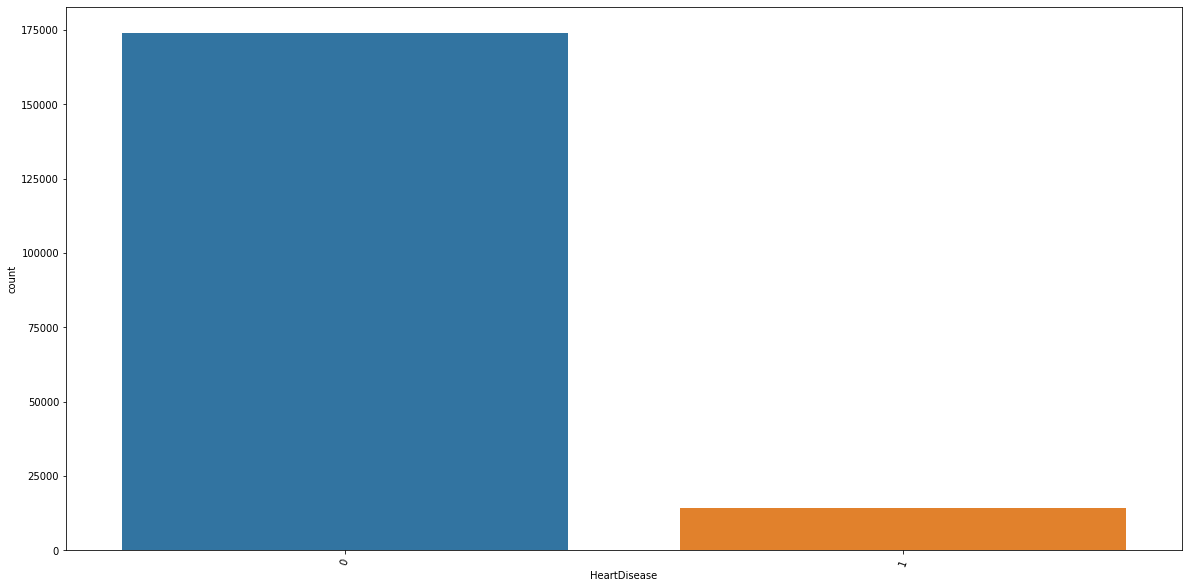

In [38]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='HeartDisease',data=data)
plt.xticks(rotation=70)

# Oversampling 

In [39]:
# Class count
count_class_0, count_class_1 = data.HeartDisease.value_counts()

# Divide by class
class_0 = data[data['HeartDisease'] == 0]
class_1 = data[data['HeartDisease'] == 1]
print(class_0.shape)
print(class_1.shape)

(174092, 17)
(14143, 17)


In [40]:
class_1=class_1.sample(count_class_0,replace=True)
data = pd.concat([class_0, class_1], axis=0)
print(data.HeartDisease.value_counts())


0    174092
1    174092
Name: HeartDisease, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split
y=data['HeartDisease']#lable
X=data.drop('HeartDisease',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
cls =LogisticRegression() 
cls.fit(X_train,Y_train)
prediction = cls.predict((X_test))
print('Mean Square Error testing model 1 ', metrics.mean_squared_error(Y_test, prediction))
print("Classification Report: \n", classification_report(Y_test, prediction))


Mean Square Error testing model 1  0.25117394488562117
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75     34819
           1       0.75      0.75      0.75     34818

    accuracy                           0.75     69637
   macro avg       0.75      0.75      0.75     69637
weighted avg       0.75      0.75      0.75     69637



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# RandomForest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
cls =RandomForestClassifier()
cls.fit(X_train,Y_train)
prediction = cls.predict((X_test))
print('Mean Square Error testing model 1 ', metrics.mean_squared_error(Y_test, prediction))
print("Classification Report: \n", classification_report(Y_test, prediction))


Mean Square Error testing model 1  0.03424903427775464
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     34819
           1       0.94      1.00      0.97     34818

    accuracy                           0.97     69637
   macro avg       0.97      0.97      0.97     69637
weighted avg       0.97      0.97      0.97     69637



In [45]:
import pickle
pickle.dump(cls,open('model1.h5','wb'))

In [46]:
model = pickle.load(open('model1.h5','rb'))


AttributeError: module 'pickle' has no attribute 'download'

In [ ]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from flask import Flask,request,jsonify
import pickle
import numpy as np


In [ ]:
app= Flask(__name__)
@app.route('/')
def home():
    return "Hell World"


In [ ]:
@app.route('/predict',methods=['POST'])
def predict():
    bmi=request.form.get('bmi')
    smoking=request.form.get('smoking')
    alcoholDrinking=request.form.get('alcoholDrinking')
    stroke=request.form.get('stroke')
    physicalHealth=request.form.get('physicalHealth')
    mentalHealth=request.form.get('mentalHealth')
    diffWalking=request.form.get('diffWalking')
    sex=request.form.get('sex')
    ageCategory=request.form.get('ageCategory')
    diabetic=request.form.get('diabetic')
    physicalActivity=request.form.get('physicalActivity')
    genHealth=request.form.get('genHealth')
    sleepTime=request.form.get('sleepTime')
    asthma=request.form.get('asthma')
    kidneyDisease=request.form.get('kidneyDisease')
    skinCancer=request.form.get('skinCancer')
    input_data=np.array([[bmi,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,
                          diffWalking,sex,ageCategory,diabetic,physicalActivity,genHealth,
                          sleepTime,asthma,kidneyDisease,skinCancer]])

    result= model.predict(input_data)[0]
    print('pefore ')
    print(result)
    print(' after')
    return jsonify({'Placement':result})
# Press the green button in the gutter to run the script.


In [ ]:
app.run(debug=True)